## PLEASE see Submission file for exam summary, this file is only the code part

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df=pd.read_csv(r'C:\Users\kisek\OneDrive\Desktop\job hunting\Datacamp certification\pet_supplies_2212.csv')
df.head(20)

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1
5,6,Housing,Dog,Small,30.77,874.58,7.0,0
6,7,Housing,Dog,Small,31.04,875.07,5.0,0
7,8,Toys,Cat,medium,28.9,1074.31,4.0,0
8,9,Equipment,Fish,MEDIUM,17.82,503.67,5.0,0
9,10,Medicine,Dog,medium,24.93,838.88,8.0,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


### Task 1

For every column in the data:

a. State whether the values match the description given in the table above.

b. State the number of missing values in the column.

c. Describe what you did to make values match the description if they did not
match.

In [99]:
df['product_id'].isnull().any()
df['product_id'].duplicated().any()

False

In [100]:
df['product_id'].nunique()

1500

In [101]:
check = df['category'].unique()
df['category'].value_counts().get('-')

25

In [102]:
df['category'] = df['category'].replace('-','Unknown')
df['category'].unique()

array(['Food', 'Housing', 'Medicine', 'Toys', 'Equipment', 'Accessory',
       'Unknown'], dtype=object)

In [103]:
df['animal'].unique()

array(['Bird', 'Dog', 'Cat', 'Fish'], dtype=object)

In [104]:
df['size'].unique()

array(['large', 'MEDIUM', 'medium', 'small', 'Small', 'Large', 'SMALL',
       'Medium', 'LARGE'], dtype=object)

In [105]:
valid_values = ['Small', 'Medium', 'Large']

invalid_values = df[~df['size'].isin(valid_values)]

count_invalid_values = len(invalid_values)
print(count_invalid_values)

1050


In [106]:
df['size'] = df['size'].str.replace('small|SMALL','Small')
df['size'] = df['size'].str.replace('large|LARGE','Large')
df['size'] = df['size'].str.replace('medium|MEDIUM','Medium')
df['size'].unique()

C:\Users\kisek\AppData\Local\Temp\ipykernel_13672\494073166.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['size'] = df['size'].str.replace('small|SMALL','Small')
C:\Users\kisek\AppData\Local\Temp\ipykernel_13672\494073166.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['size'] = df['size'].str.replace('large|LARGE','Large')
C:\Users\kisek\AppData\Local\Temp\ipykernel_13672\494073166.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['size'] = df['size'].str.replace('medium|MEDIUM','Medium')


array(['Large', 'Medium', 'Small'], dtype=object)

In [107]:
df['price'].value_counts().get('unlisted')

150

In [108]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [109]:
non_numeric_values = df[~pd.to_numeric(df['price'], errors='coerce').notna()]
non_numeric_values['price'].unique()

array([nan])

In [110]:
negative = df['price'] <= 0
negative.unique()

array([False])

In [111]:
#len(df[df['price'].astype(str).str.match(r'\d+\.\d{2}$') == False])
not_two_decimal = df[df['price'].astype(str).str.match(r'\d+\.\d{2}$') == False]
not_two_decimal['price'].count()

129

In [112]:
df['price'] = df['price'].round(2)

In [113]:
overall_median = df['price'].median()

df['price'].fillna(overall_median, inplace=True)

In [114]:
overall_median

28.064999999999998

In [115]:
df['sales'].unique()

array([1860.62,  963.6 ,  898.3 , ..., 1099.97,  724.02,  826.08])

In [116]:
non_numeric_values = df[~pd.to_numeric(df['sales'], errors='coerce').notna()]
non_numeric_values['sales'].unique()

array([], dtype=float64)

In [117]:
negative = df['sales'] <= 0
negative.unique()

array([False])

In [118]:
not_two_decimal = df[df['sales'].astype(str).str.match(r'\d+\.\d{2}$') == False]
not_two_decimal['sales'].count()

143

In [119]:
df['sales'] = df['sales'].round(2)

In [120]:
df['rating'].unique()

array([ 7.,  6.,  5.,  4.,  8.,  1.,  3., nan,  2.,  9.])

In [121]:
df['rating'].isnull().sum()

150

In [122]:
df['rating'].fillna(0, inplace=True)

In [123]:
df['rating'] = df['rating'].astype("int64")

In [124]:
df['repeat_purchase'].unique()

array([1, 0], dtype=int64)

In [125]:
df['repeat_purchase'] = df['repeat_purchase'].astype(bool)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   int64  
 7   repeat_purchase  1500 non-null   bool   
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### Task 2 

Create a visualization that shows how many products are repeat purchases. Use the visualization to:

a. State which category of the variable repeat purchases has the most
observations

b. Explain whether the observations are balanced across categories of the
variable repeat purchases

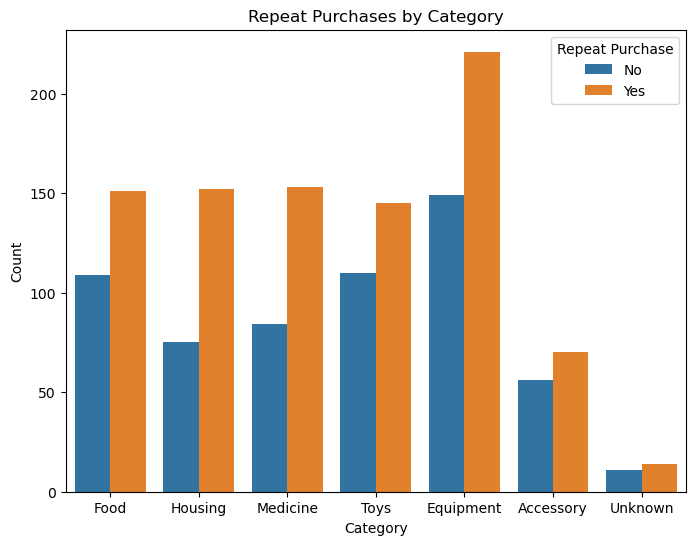

In [127]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='category', hue='repeat_purchase')
plt.title("Repeat Purchases by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Repeat Purchase", labels=["No", "Yes"])
#plt.show()
plt.savefig('repeat_purchases_by_category.png')

In [128]:
category_counts = df.groupby(['category', 'repeat_purchase']).size().unstack()
print("Count of Repeat Purchases by Category:")
print(category_counts)

# Check if observations are balanced across categories of repeat purchases
balanced = category_counts.fillna(0).min(axis=1).std() < 1
if balanced:
    print("\nObservations are balanced across categories of repeat purchases.")
else:
    print("\nObservations are not balanced across categories of repeat purchases.")

Count of Repeat Purchases by Category:
repeat_purchase  False  True 
category                     
Accessory           56     70
Equipment          149    221
Food               109    151
Housing             75    152
Medicine            84    153
Toys               110    145
Unknown             11     14

Observations are not balanced across categories of repeat purchases.


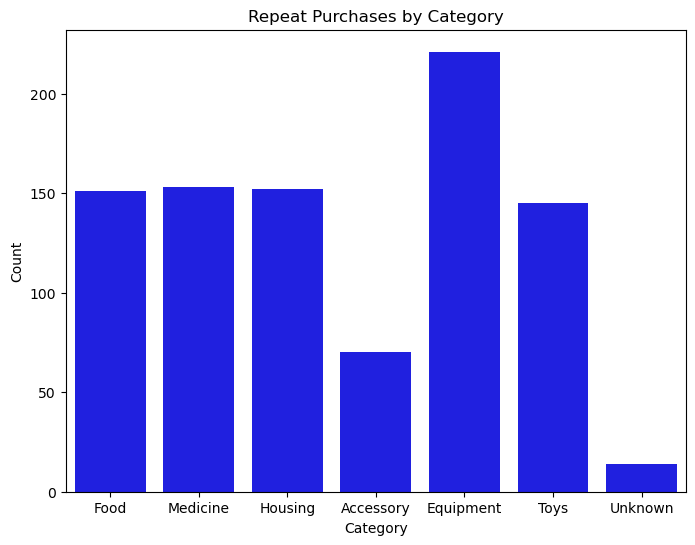

In [129]:
df_repeat_yes = df[df['repeat_purchase'] == True]

# Create a bar plot to visualize repeat purchases by category for Repeat Purchase = YES
plt.figure(figsize=(8, 6))
sns.countplot(data=df_repeat_yes, x='category', color = 'blue')
plt.title("Repeat Purchases by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
#plt.savefig('repeat_purchases_by_category.png')

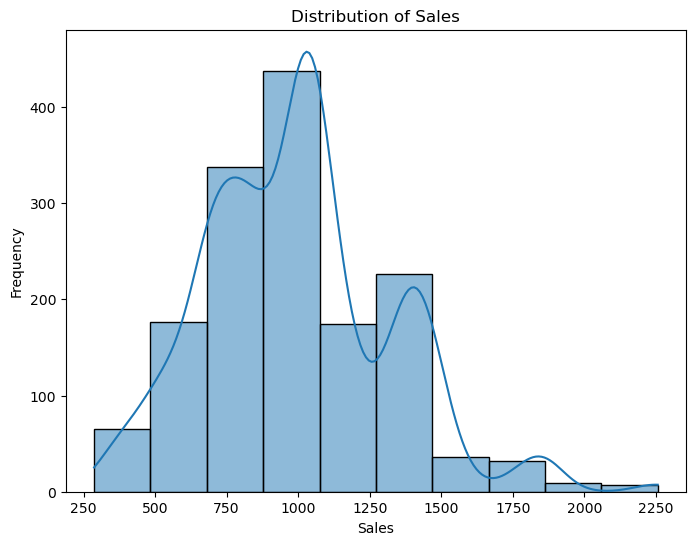

In [130]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='sales', bins=10, kde=True)
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()
#plt.savefig('Sales_Distribution.png')

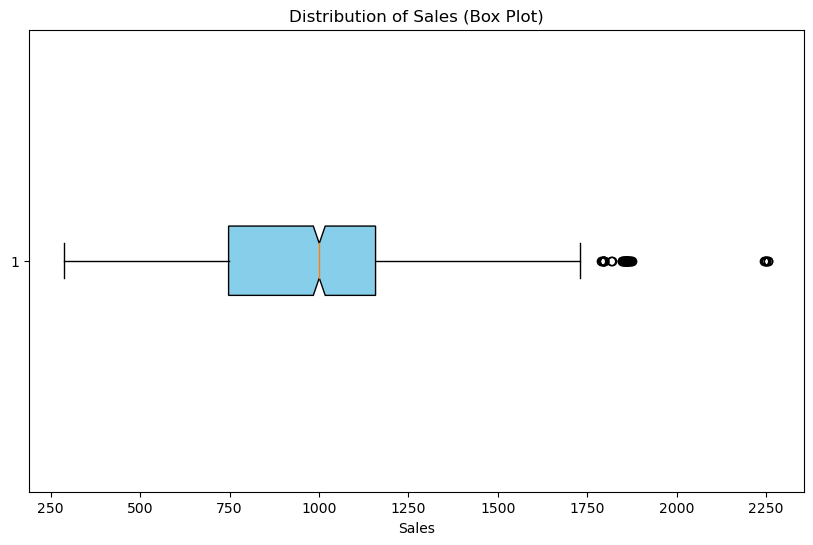

In [131]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['sales'], vert=False, notch=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.xlabel('Sales')
plt.title('Distribution of Sales (Box Plot)')

#plt.show()
plt.savefig('Sales_Distribution - boxplot.png')

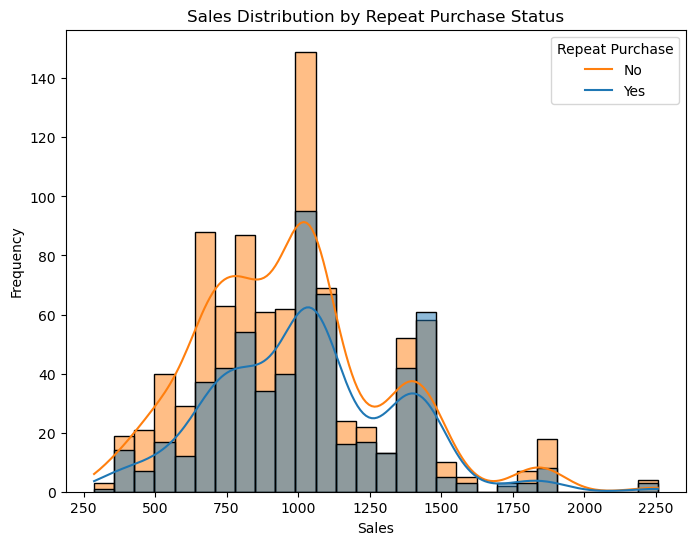

In [132]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='sales', hue='repeat_purchase', kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution by Repeat Purchase Status')
plt.legend(title='Repeat Purchase', labels=['No', 'Yes'])
plt.show()
#plt.savefig('Sales_Distribution_by_Repeat_Purchase.png')

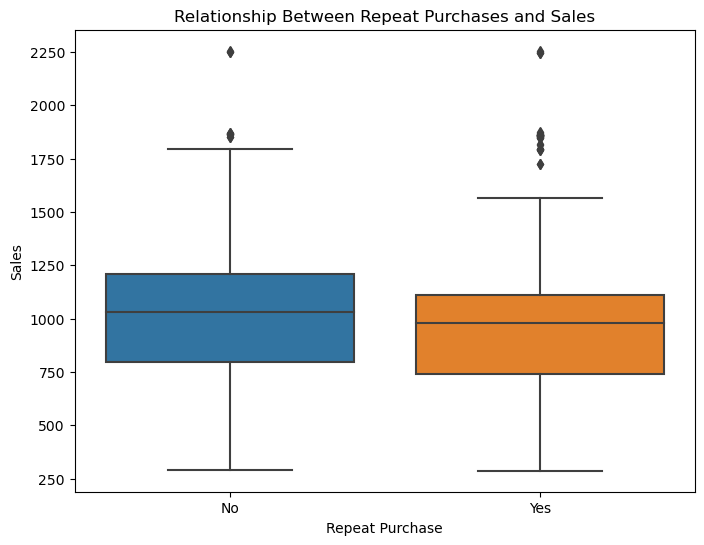

In [133]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='repeat_purchase', y='sales', data=df)
plt.xlabel('Repeat Purchase')
plt.ylabel('Sales')
plt.title('Relationship Between Repeat Purchases and Sales')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()
#plt.savefig('Box Plot - Sales_Distribution_by_Repeat_Purchase.png')

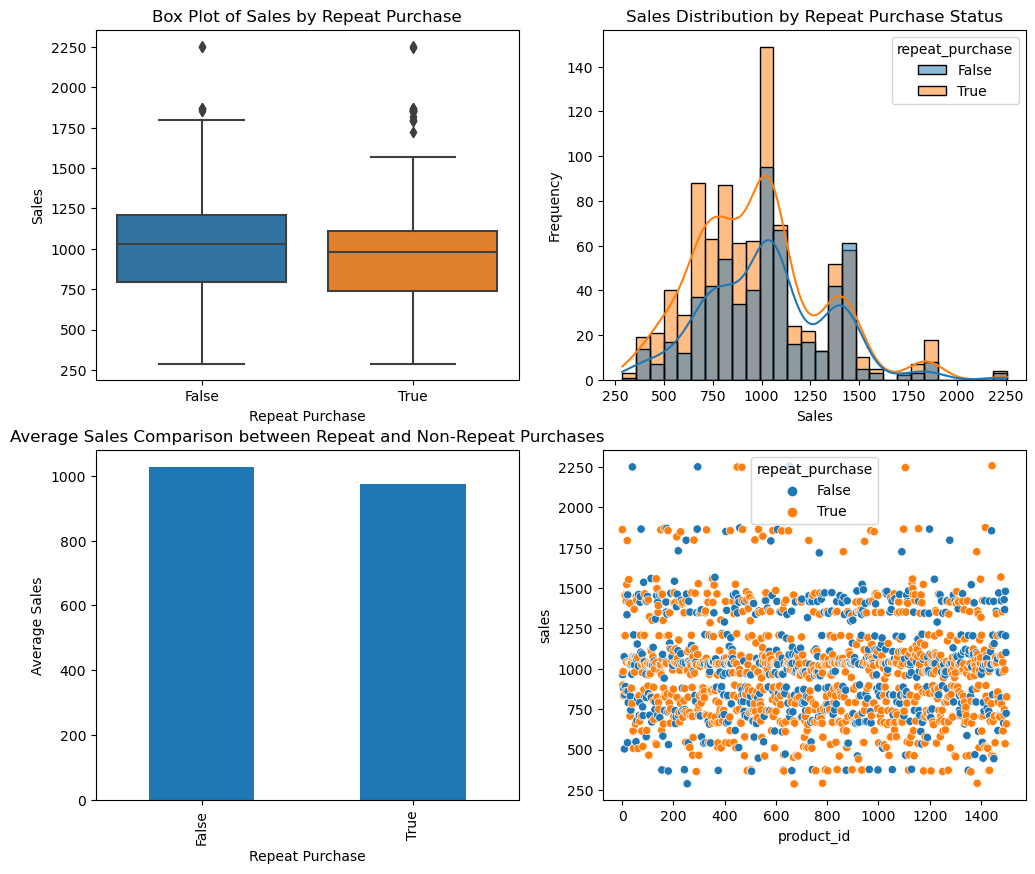

In [134]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Visualization 1: Box Plot
sns.boxplot(x='repeat_purchase', y='sales', data=df, ax=axes[0, 0])
axes[0, 0].set_xlabel('Repeat Purchase')
axes[0, 0].set_ylabel('Sales')
axes[0, 0].set_title('Box Plot of Sales by Repeat Purchase')

# Visualization 2: Histogram with KDE
sns.histplot(data=df, x='sales', hue='repeat_purchase', kde=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('Sales')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Sales Distribution by Repeat Purchase Status')

# Visualization 3: Bar Plot (Average Sales Comparison)
avg_sales_by_repeat = df.groupby('repeat_purchase')['sales'].mean()
avg_sales_by_repeat.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_xlabel('Repeat Purchase')
axes[1, 0].set_ylabel('Average Sales')
axes[1, 0].set_title('Average Sales Comparison between Repeat and Non-Repeat Purchases')

# Visualization 4: Scatter Plot (Product ID vs. Sales)
sns.scatterplot(data=df, x='product_id', y='sales', hue='repeat_purchase', ax=axes[1, 1])
axes[1, 1].set

plt.savefig('Sales_Distribution_by_Repeat_Purchase_integrated.png')

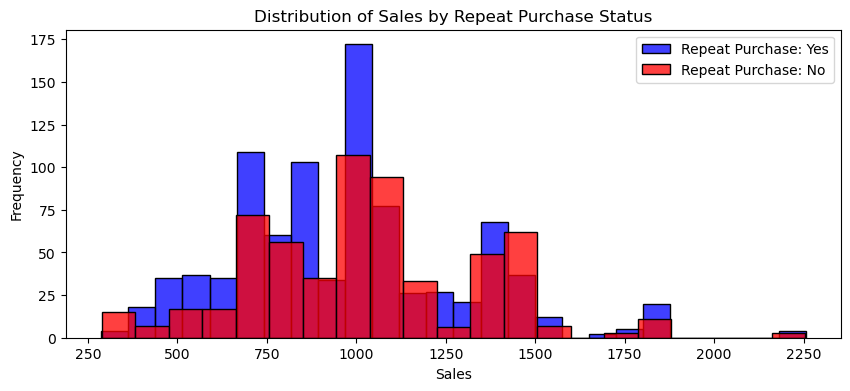

In [135]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df[df['repeat_purchase']], x='sales', color='blue', label='Repeat Purchase: Yes')
sns.histplot(data=df[~df['repeat_purchase']], x='sales', color='red', label='Repeat Purchase: No')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales by Repeat Purchase Status')
plt.legend()
#plt.show()
plt.savefig('Sales_Distribution_by_Repeat_Purchase_integrated.png')

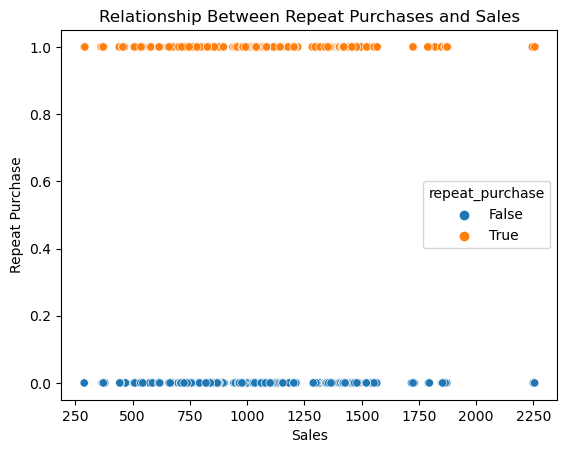

In [136]:
sns.scatterplot(x='sales', y='repeat_purchase', data=df, hue='repeat_purchase', marker='o')
plt.xlabel('Sales')
plt.ylabel('Repeat Purchase')
plt.title('Relationship Between Repeat Purchases and Sales')
plt.show()

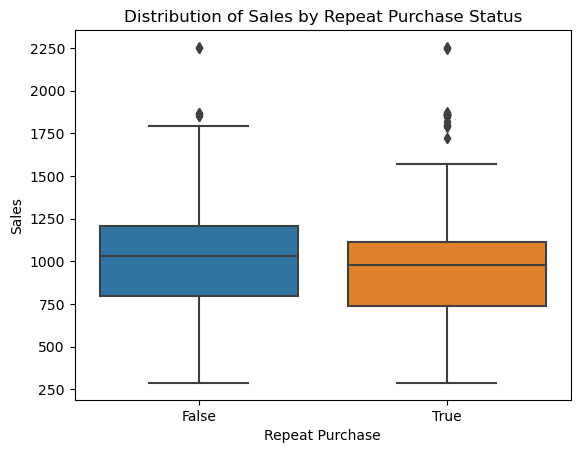

In [137]:
sns.boxplot(x='repeat_purchase', y='sales', data=df)
plt.xlabel('Repeat Purchase')
plt.ylabel('Sales')
plt.title('Distribution of Sales by Repeat Purchase Status')
plt.show()

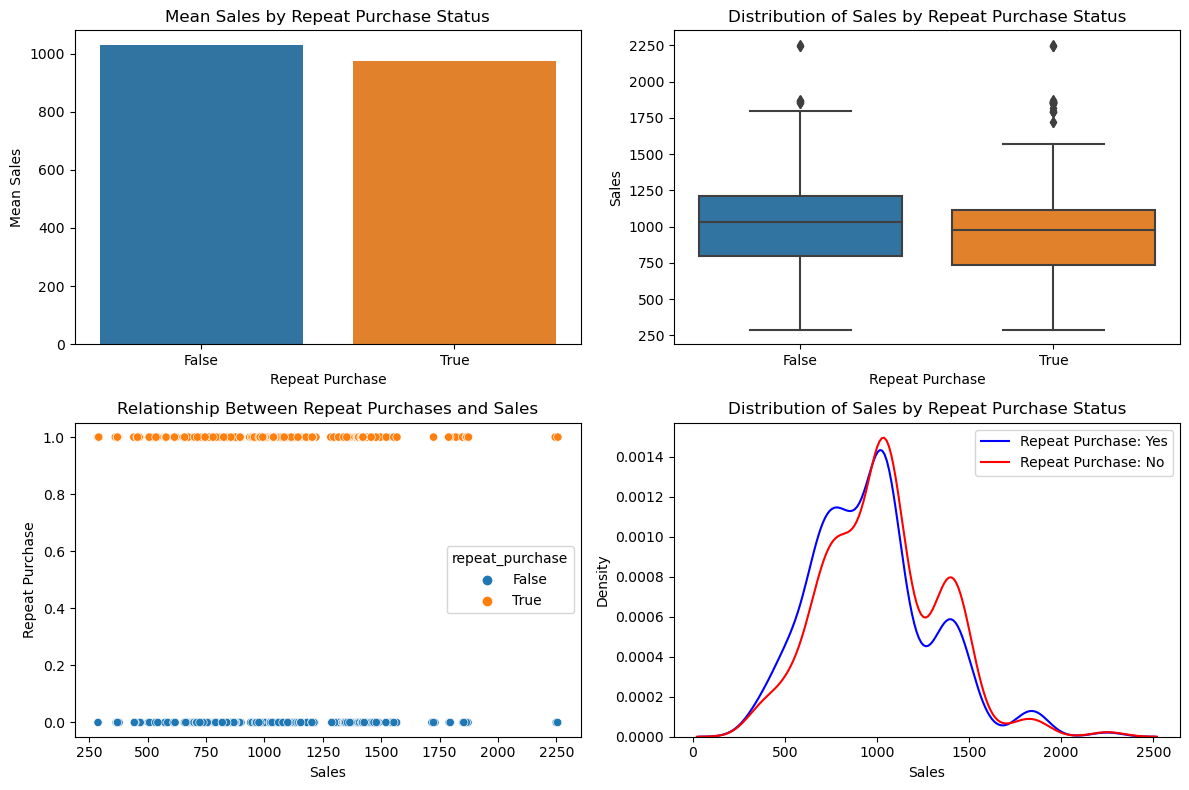

In [138]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Bar Plot (Mean Sales by Repeat Purchase)
sales_by_repeat = df.groupby('repeat_purchase')['sales'].mean().reset_index()
sns.barplot(x='repeat_purchase', y='sales', data=sales_by_repeat, ax=axes[0, 0])
axes[0, 0].set_xlabel('Repeat Purchase')
axes[0, 0].set_ylabel('Mean Sales')
axes[0, 0].set_title('Mean Sales by Repeat Purchase Status')

# Plot 2: Box Plot (Distribution of Sales by Repeat Purchase)
sns.boxplot(x='repeat_purchase', y='sales', data=df, ax=axes[0, 1])
axes[0, 1].set_xlabel('Repeat Purchase')
axes[0, 1].set_ylabel('Sales')
axes[0, 1].set_title('Distribution of Sales by Repeat Purchase Status')

# Plot 3: Scatter Plot (Relationship Between Repeat Purchases and Sales)
sns.scatterplot(x='sales', y='repeat_purchase', data=df, hue='repeat_purchase', marker='o', ax=axes[1, 0])
axes[1, 0].set_xlabel('Sales')
axes[1, 0].set_ylabel('Repeat Purchase')
axes[1, 0].set_title('Relationship Between Repeat Purchases and Sales')

# Plot 4: Density Plot (Distribution of Sales by Repeat Purchase)
sns.kdeplot(df[df['repeat_purchase']]['sales'], color='blue', label='Repeat Purchase: Yes', ax=axes[1, 1])
sns.kdeplot(df[~df['repeat_purchase']]['sales'], color='red', label='Repeat Purchase: No', ax=axes[1, 1])
axes[1, 1].set_xlabel('Sales')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Distribution of Sales by Repeat Purchase Status')
axes[1, 1].legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined visualization
plt.show()